# The Problem :
### A bank wants to segment its customers into different groups based on their spending habits and demographics. This will help the bank to target marketing campaigns more effectively and to understand how to better serve its customers

## Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Import Data

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/bank-marketing-dataset.csv")

## View the top 5 rows of data  

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## View the bottom 5 rows of data

In [7]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


## Display the number of missing values in each column

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## Selecting Features for Clustering

In [9]:
features = ['age', 'balance', 'campaign']

## Creating K-Means Model

In [10]:
kmeans = KMeans(n_clusters = 5)

## Fit the Kmeans model to the data

In [11]:
kmeans.fit(df[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

## Predict the cluster label for each customer

In [12]:
labels = kmeans.predict(df[features])

## Cluster Visualization

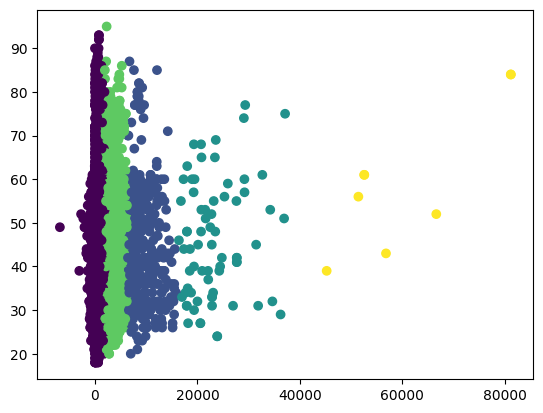

In [13]:
plt.scatter(df['balance'], df['age'], c=labels)
plt.show()

## Create a bar chart of the number of customers in each age group

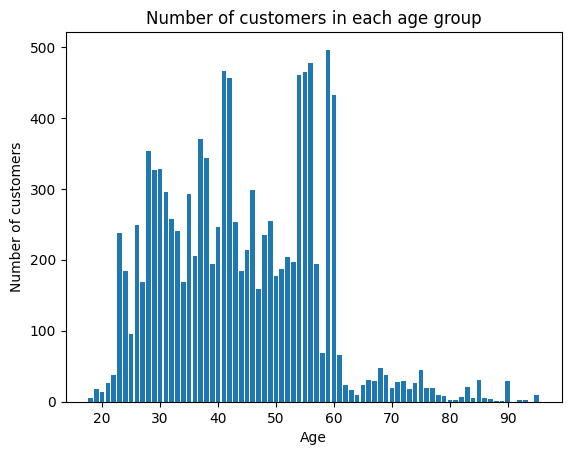

In [14]:
plt.bar(df["age"].unique(), df["age"].value_counts())
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.title("Number of customers in each age group")
plt.show()

## Create a pie chart of the number of customers responding to a marketing campaign

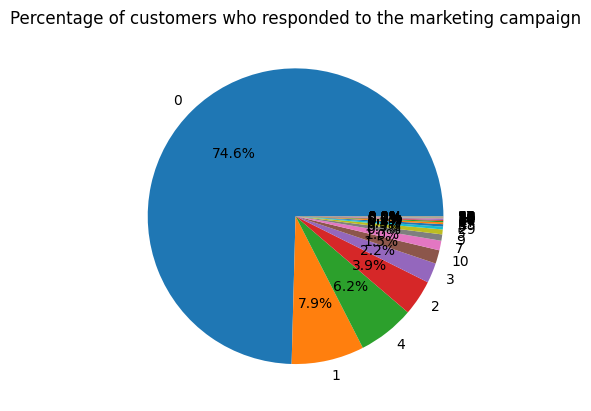

In [15]:
plt.pie(df["previous"].value_counts(), labels=df["previous"].unique(), autopct="%1.1f%%")
plt.title("Percentage of customers who responded to the marketing campaign")
plt.show()

## Create a scatter plot of customer age and balance:

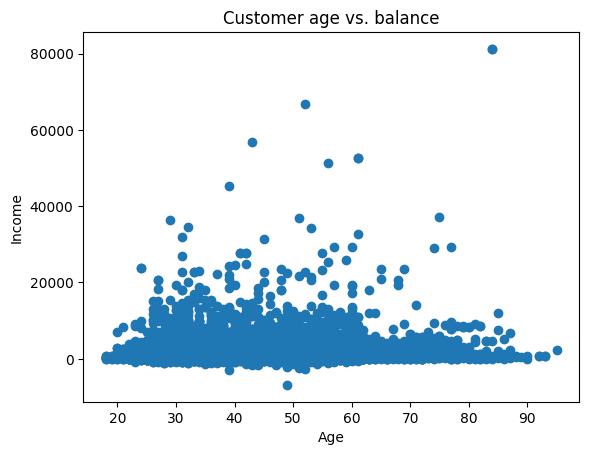

In [16]:
plt.scatter(df["age"], df["balance"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Customer age vs. balance")
plt.show()

## Calculate the correlation coefficient between each pair of features

In [17]:
correlation = df[['age','balance','day','duration','campaign','pdays','previous']].corr()

## Identify the features with the strongest correlation with customer subscription

In [18]:
most_correlated_features = correlation['previous'].nlargest(5)

## Interpret the results of the analysis.

In [19]:
print("The features that are most strongly correlated with customer subscription are:")
print(most_correlated_features)

The features that are most strongly correlated with customer subscription are:
previous    1.000000
pdays       0.507272
balance     0.030805
age         0.020169
duration   -0.026716
Name: previous, dtype: float64




*   previous: Faktor ini memiliki korelasi positif paling tinggi dengan langganan pelanggan, dengan nilai korelasi sebesar 1. Korelasi ini menunjukkan bahwa semakin tinggi jumlah kontak sebelumnya yang dilakukan dengan pelanggan, semakin besar kemungkinan pelanggan akan berlangganan.List item

*   pdays: Faktor ini memiliki korelasi positif yang cukup tinggi dengan langganan pelanggan, dengan nilai korelasi sekitar 0.51. Hal ini menunjukkan bahwa semakin lama sejak kontak terakhir dengan pelanggan (dalam hari), semakin besar kemungkinan pelanggan akan berlangganan.

* balance: Faktor ini memiliki korelasi positif yang rendah dengan langganan pelanggan, dengan nilai korelasi sekitar 0.03. Korelasi ini menunjukkan bahwa saldo rata-rata tahunan pelanggan memiliki sedikit pengaruh terhadap keputusan pelanggan untuk berlangganan.

* age: Faktor ini memiliki korelasi positif yang rendah dengan langganan pelanggan, dengan nilai korelasi sekitar 0.02. Hal ini menunjukkan bahwa usia pelanggan memiliki sedikit pengaruh terhadap keputusan pelanggan untuk berlangganan.
* duration: Faktor ini memiliki korelasi negatif yang rendah dengan langganan pelanggan, dengan nilai korelasi sekitar -0.03. Korelasi ini menunjukkan bahwa durasi kontak terakhir dengan pelanggan memiliki sedikit pengaruh terhadap keputusan pelanggan untuk berlangganan, bahkan cenderung memiliki hubungan negatif. Artinya, semakin lama durasi kontak terakhir, semakin kecil kemungkinan pelanggan akan berlangganan.


Menargetkan Kampanye Pemasaran: Dengan mengetahui faktor-faktor yang paling berpengaruh terhadap langganan pelanggan, bank dapat menyesuaikan strategi pemasaran mereka untuk lebih efektif menarik pelanggan baru atau mempertahankan pelanggan yang sudah ada.

Melayani Nasabah: Memahami faktor-faktor yang mempengaruhi keputusan langganan juga dapat membantu bank untuk menyediakan layanan yang lebih baik dan sesuai dengan kebutuhan nasabah, meningkatkan kepuasan pelanggan dan retensi.







